In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/meerkat-211021'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [25]:
db=ca.database._get_database_class('dbbact')

# Load the dataset
From:

Diurnal oscillations in gut bacterial load and composition eclipse seasonal and lifetime dynamics in wild meerkats

Risely, A., Wilhelm, K., Clutton-Brock, T., Manser, M. B., & Sommer, S. (2021)

Nature communications, 12(1), 1-12

https://doi.org/10.1038/s41467-021-26298-5

In [7]:
dat=ca.read_amplicon('./all.biom','./map.joined.txt',normalize=10000,min_reads=1000)

2022-06-24 16:51:10 INFO loaded 1212 samples, 19678 features
2022-06-24 16:51:10 WARNING These have metadata but do not have data - dropped (12): {'SRR15931352', 'SRR15931359', 'SRR15931528', 'SRR15931533', 'SRR15931351', 'SRR15931535', 'SRR15931349', 'SRR15931361', 'SRR15931353', 'SRR15931350', 'SRR15931534', 'SRR15929705'}
2022-06-24 16:51:10 WARNING Do you forget to normalize your data? It is required before running this function
2022-06-24 16:51:10 INFO After filtering, 1197 remain.


In [8]:
datc=dat.cluster_features(10)
datc

2022-06-24 16:51:11 INFO After filtering, 10922 remain.


AmpliconExperiment with 1197 samples, 10922 features

In [9]:
feces=datc.filter_samples('Isolation_source','FAECAL PELLET')
feces

AmpliconExperiment with 1171 samples, 10922 features

# Get the features higher in morning/afternoon

In [10]:
dd=feces.diff_abundance('SampleTimeCat','MORNING','AFTERNOON',random_seed=2022)

2022-06-24 16:52:22 INFO 1137 samples with both values
2022-06-24 16:52:22 INFO After filtering, 10645 remain.
2022-06-24 16:52:22 INFO 765 samples with value 1 (['MORNING'])
2022-06-24 16:52:33 INFO number of higher in MORNING: 568. number of higher in AFTERNOON : 4400. total 4968


2022-06-24 16:52:33 INFO Getting dbBact annotations for 4968 sequences, please wait...
2022-06-24 16:52:33 INFO Limited to maximal annotationid: 7440
2022-06-24 16:53:03 INFO got 5172 annotations
2022-06-24 16:53:03 WARNING ignoring 1 annotation with id > max_id 7440
2022-06-24 16:53:03 INFO Got 100524 annotation-sequence pairs
2022-06-24 16:53:03 INFO Added annotation data to experiment. Total 5171 annotations, 4968 ASVs
2022-06-24 16:53:03 INFO Found 1 experiments ([839]) matching current experiment - ignoring them.
2022-06-24 16:53:17 INFO found 7 negative
2022-06-24 16:53:32 INFO found 7 positive


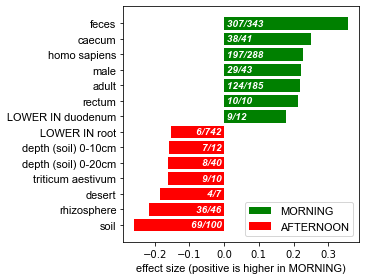

In [11]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [12]:
f.figure.savefig('./fig-terms-time.pdf')

In [13]:
e.save('./table-terms-time')

2022-06-24 16:54:09 INFO Metadata field taxonomy not found. Saving biom table without metadata


# Wordclouds for the monrning/afternoon samples

In [14]:
morning=feces.filter_samples('SampleTimeCat','MORNING')
afternoon=feces.filter_samples('SampleTimeCat','AFTERNOON')

2022-06-24 16:54:24 INFO After filtering, 190 remain.
2022-06-24 16:54:24 INFO Getting dbBact annotations for 190 sequences, please wait...
2022-06-24 16:54:24 INFO Limited to maximal annotationid: 7440
2022-06-24 16:54:33 INFO got 3406 annotations
2022-06-24 16:54:33 WARNING ignoring 1 annotation with id > max_id 7440
2022-06-24 16:54:34 INFO Got 11610 annotation-sequence pairs
2022-06-24 16:54:34 INFO Added annotation data to experiment. Total 3405 annotations, 190 ASVs
2022-06-24 16:54:34 INFO Found 1 experiments ([839]) matching current experiment - ignoring them.


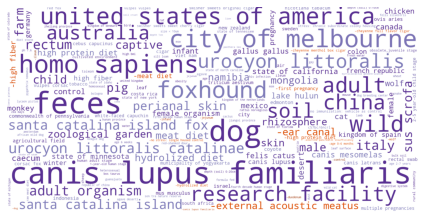

In [15]:
f=db.draw_wordcloud(morning.filter_prevalence(0.3),ignore_exp=True,max_id=7440)

In [16]:
f.savefig('./fig-wordcloud-morning')

2022-06-24 16:54:40 INFO After filtering, 189 remain.
2022-06-24 16:54:40 INFO Getting dbBact annotations for 189 sequences, please wait...
2022-06-24 16:54:40 INFO Limited to maximal annotationid: 7440
2022-06-24 16:54:47 INFO got 3649 annotations
2022-06-24 16:54:47 WARNING ignoring 0 annotation with id > max_id 7440
2022-06-24 16:54:47 INFO Got 15343 annotation-sequence pairs
2022-06-24 16:54:47 INFO Added annotation data to experiment. Total 3649 annotations, 189 ASVs
2022-06-24 16:54:47 INFO Found 1 experiments ([839]) matching current experiment - ignoring them.


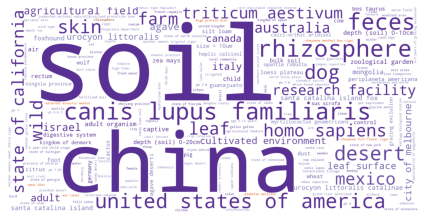

In [17]:
f=db.draw_wordcloud(afternoon.filter_prevalence(0.3),ignore_exp=True,max_id=7440)

In [18]:
f.savefig('./fig-wordcloud-afternoon')

2022-06-24 17:21:59 INFO found 949 annotations with the term ['soil']
2022-06-24 17:22:03 INFO annotation 6280 is low
2022-06-24 17:22:04 INFO annotation 6283 is low
2022-06-24 17:22:06 INFO annotation 6320 is low
2022-06-24 17:22:08 INFO annotation 6407 is low
2022-06-24 17:22:25 INFO annotation 2510 is low
2022-06-24 17:22:29 INFO annotation 2537 is low
2022-06-24 17:22:46 INFO annotation 2646 is low
2022-06-24 17:23:06 INFO annotation 4846 is low
2022-06-24 17:23:11 INFO annotation 810 is low
2022-06-24 17:23:20 INFO annotation 1017 is low
2022-06-24 17:23:25 INFO annotation 1101 is low
2022-06-24 17:23:39 INFO annotation 1241 is low
2022-06-24 17:23:42 INFO annotation 3497 is low
2022-06-24 17:23:45 INFO annotation 1622 is low
2022-06-24 17:23:52 INFO annotation 1749 is low
2022-06-24 17:23:52 INFO annotation 1750 is low
2022-06-24 17:23:54 INFO annotation 1795 is low
2022-06-24 17:23:54 INFO annotation 1796 is low
2022-06-24 17:24:12 INFO ignored 0 annotations
2022-06-24 17:24:12 

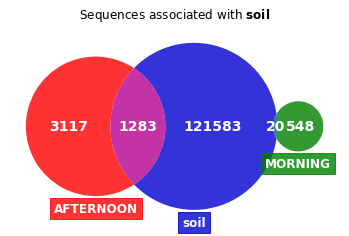

In [30]:
f=db.plot_term_venn_all('soil',dd,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':14},max_id=7440,max_size=5000)

In [31]:
f.savefig('./fig-venn-soil.pdf')

# Create the time dependent soil/fecal association graphs

In [95]:
tt=feces.filter_samples('time',None)

In [98]:
tt=cu.numeric_to_categories(tt,'timenum','timecat',[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2])

In [99]:
tt.sample_metadata.timecat.value_counts()

0.3-0.4    369
0.7-0.8    284
0.4-0.5    263
0.2-0.3     59
0.5-0.6     54
0.6-0.7     45
0.8-0.9     34
Name: timecat, dtype: int64

In [132]:
labs=[]
numsoil=[]
numfeces=[]
numtot=[]
tlabs=[]
for cval,cexp in tt.iterate('timecat_num'):
    print(cval)
    labs.append(cval)
    tlabs.append(cexp.sample_metadata.sort_values('timenum').iloc[-1]['time'])
    cexp=cexp.filter_prevalence(0.1)
    numtot.append(len(cexp.feature_metadata))
    cexp=cexp.add_terms_to_features('dbbact',['soil','feces'],ignore_exp=True)
    numsoil.append(np.sum(cexp.feature_metadata['common_term']=='soil'))
    numfeces.append(np.sum(cexp.feature_metadata['common_term']=='feces'))

0.5
2022-05-18 16:53:10 INFO After filtering, 499 remain.
2022-05-18 16:53:10 INFO Getting dbBact annotations for 499 sequences, please wait...
2022-05-18 16:53:19 INFO got 4264 annotations
2022-05-18 16:53:19 INFO Got 28005 annotation-sequence pairs
2022-05-18 16:53:19 INFO Added annotation data to experiment. Total 4264 annotations, 499 ASVs
2022-05-18 16:53:19 INFO Found 1 experiments ([839]) matching current experiment - ignoring them.
0.4
2022-05-18 16:53:31 INFO After filtering, 450 remain.
2022-05-18 16:53:31 INFO Getting dbBact annotations for 450 sequences, please wait...
2022-05-18 16:53:40 INFO got 4184 annotations
2022-05-18 16:53:40 INFO Got 25868 annotation-sequence pairs
2022-05-18 16:53:40 INFO Added annotation data to experiment. Total 4184 annotations, 450 ASVs
2022-05-18 16:53:40 INFO Found 1 experiments ([839]) matching current experiment - ignoring them.
0.9
2022-05-18 16:53:58 INFO After filtering, 548 remain.
2022-05-18 16:53:58 INFO Getting dbBact annotations fo

In [134]:
rat=[]
sfrat=[]
frat=[]
for i in range(len(labs)):
    rat.append(numsoil[i]/numtot[i])
    frat.append(numfeces[i]/numtot[i])
    sfrat.append(numsoil[i]/numfeces[i])

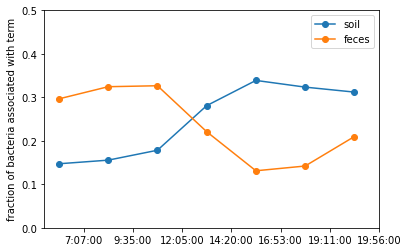

In [151]:
labs=np.array(labs)
rat=np.array(rat)
frat=np.array(frat)
sfrat=np.array(sfrat)
tlabs=np.array(tlabs)
si=np.argsort(labs)
labs=labs[si]
rat=rat[si]
sfrat=sfrat[si]
frat=frat[si]
f=plt.figure()
plt.plot(labs-0.05,rat,'-o')
# plt.ylim([0,0.5])
plt.ylabel('fraction of soil associated bacteria')
plt.plot(labs-0.05,frat,'-o')
plt.ylim([0,0.5])
plt.ylabel('fraction of bacteria associated with term')
plt.legend(['soil','feces'])
ax=plt.gca()
ax.set_xticks(labs)
ax.set_xticklabels(tlabs)
pass

In [152]:
f.savefig('./fig-time-fec-soil.pdf')

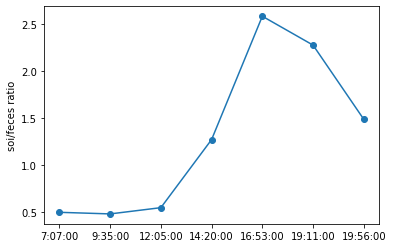

In [153]:
f=plt.figure()
plt.plot(labs,sfrat,'-o')
# plt.ylim([0,0.5])
plt.ylabel('soi/feces ratio')
ax=plt.gca()
ax.set_xticks(labs)
ax.set_xticklabels(tlabs)
pass

In [154]:
f.savefig('./fig-time-ratio.pdf')